In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-4\house_prices.csv")

# Show column names and first few rows
print(df.columns.tolist())
print(df.head())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load Dataset
df = pd.read_csv(r'C:\Users\Fazal\OneDrive\Desktop\Internship\Task-4\house_prices.csv')

#Check for missing values
print("Missing values:\n", df.isnull().sum())

#Define Features and Target
X = df.drop('price', axis=1)
y = df['price']

# Identify numerical and categorical columns
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']

#Create Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

#Build Full Pipeline with Linear Regression
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Model
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

#Compare Actual vs Predicted
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("\nSample Predictions:\n", results_df.head())

#Save predictions
results_df.to_csv('housing_price_predictions.csv', index=False)

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Model Performance:
RMSE: 1324506.96
R² Score: 0.65

Sample Predictions:
      Actual Price  Predicted Price
316       4060000     5.164654e+06
77        6650000     7.224722e+06
360       3710000     3.109863e+06
90        6440000     4.612075e+06
493       2800000     3.294646e+06


In [18]:
# Get names of features after preprocessing
encoded_feature_names = model.named_steps['preprocessing'].transformers_[1][1]\
    .get_feature_names_out(categorical_features)

# Combine numeric and encoded categorical names
all_feature_names = numeric_features + list(encoded_feature_names)

# Get model coefficients
coefficients = model.named_steps['regression'].coef_

# Combine into a dataframe
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort by absolute impact
importance_df['AbsCoeff'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='AbsCoeff', ascending=False)

# Drop helper column and show
print("\nTop Most Impactful Features:\n")
print(importance_df.drop('AbsCoeff', axis=1))


Top Most Impactful Features:

                            Feature    Coefficient
9               airconditioning_yes  791426.735843
8               hotwaterheating_yes  684649.885339
10                     prefarea_yes  629890.565313
2                         bathrooms  521879.027748
0                              area  519552.416340
12     furnishingstatus_unfurnished -413645.062228
7                      basement_yes  390251.176181
5                      mainroad_yes  367919.947680
3                           stories  349251.438906
6                     guestroom_yes  231610.037176
4                           parking  192005.953667
11  furnishingstatus_semi-furnished -126881.817585
1                          bedrooms   57349.559419



Correlation with Price:
              price      area  bedrooms
price     1.000000  0.535997  0.366494
area      0.535997  1.000000  0.151858
bedrooms  0.366494  0.151858  1.000000


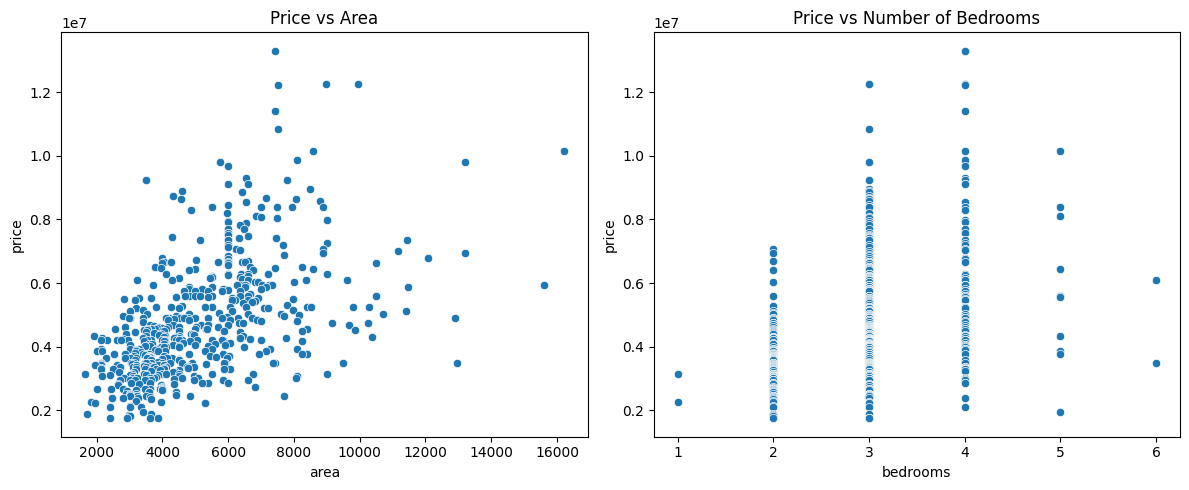

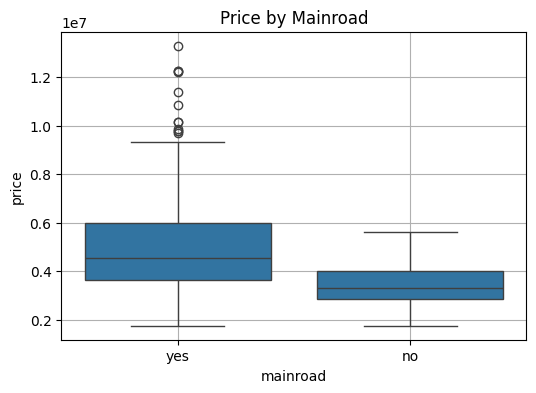

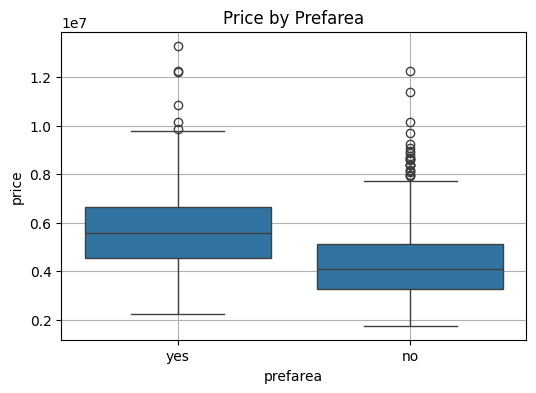

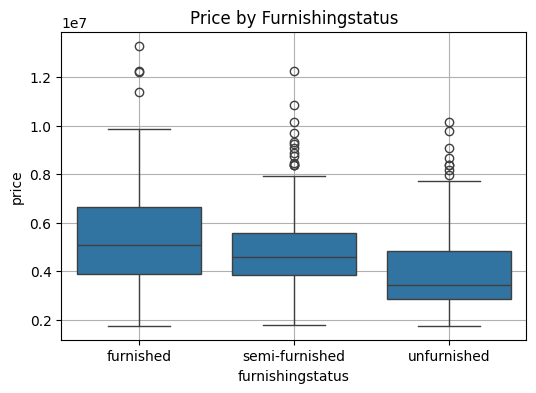

In [21]:
# Correlation with price
correlations = df[['price', 'area', 'bedrooms']].corr()
print("\nCorrelation with Price:\n", correlations)

# Scatter plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='area', y='price')
plt.title('Price vs Area')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title('Price vs Number of Bedrooms')

plt.tight_layout()
plt.show()

# Categorical impact on price
categoricals = ['mainroad', 'prefarea', 'furnishingstatus']

for col in categoricals:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price by {col.capitalize()}')
    plt.grid(True)
    plt.show()